In [1]:
from importlib import reload
import os
from time import time

import numpy as np
import scipy as sc
import pandas as pd
from statsmodels.stats.weightstats import _zstat_generic

import torch
print(torch.cuda.is_available())

import pprint
import editdistance

import utils

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

True


2023-11-27 18:54:47.667579: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 18:54:47.848870: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 18:54:47.848905: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-27 18:54:47.848938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-27 18:54:47.886461: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

<IPython.core.display.Javascript object>

In [60]:
def get_lhat(y_n, yhat_n, yhat_N, w_n = None, w_N = None):
    # compute lambda hat, estimate of lambda that yields minimal
    # asymptotic variance
    lhat_num = np.cov(np.vstack([y_n[None, :], yhat_n[None, :]]), bias=True)[0, 1]
    lhat_denom = (1 + y_n.size / yhat_N.size) * np.cov(np.hstack([yhat_n, yhat_N]), bias=True)
    lhat = lhat_num / lhat_denom
    return lhat

def get_ppipp_pvalue(y_n, yhat_n, yhat_N):
    lhat = get_lhat(y_n, yhat_n, yhat_N)
    
    # compute point estimate with lambda hat
    # point_estimate =
    
    # compute variance estimate
    # zstat, pval = _zstat_generic()
    # return pval

0.07162290923126846 0.9990296569562044


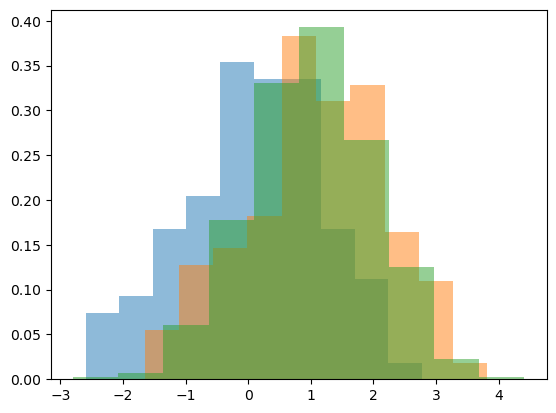

In [61]:
n = 100
N = 1000
y_n = np.random.randn(n)
yhat_n = y_n + 0.05 * np.random.randn(n) + 1
yhat_N = np.random.randn(N) + 0.05 * np.random.randn(N) + 1
print(np.mean(y_n), np.mean(yhat_N))

plt.hist(y_n, alpha=0.5, density=True);
plt.hist(yhat_n, alpha=0.5, density=True);
plt.hist(yhat_N, alpha=0.5, density=True);

In [62]:
lhat_mine = get_lhat(y_n, yhat_n, yhat_N)

lhat, pval = ppi_mean_pval(
    y_n,
    yhat_n,
    yhat_N,
    null=0,
    alternative='larger',
    lhat=None,
    w=None,
    w_unlabeled=None,
)
print(lhat_mine, lhat)

1.088532675688768 1.0885326756887679
